<a href="https://colab.research.google.com/github/shubh2001/MajorProject/blob/main/RNN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
file_path = "/content/drive/MyDrive/A32_5.DAT"

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv(file_path,
                 sep="\s+",names=['Time','A1','A2','A3','A4','A5'])
df.index.freq = 'S'


In [144]:
df.head()

,Time,A1,A2,A3,A4,A5
0,1259.89954,-1.8701,1.18590,-0.210350,0.106850,-0.022986
1,1260.10754,-1.8671,1.00230,-0.159300,0.052682,-0.007717
2,1260.31555,-1.8447,0.81752,-0.106960,0.007654,0.003839
3,1260.52356,-1.8028,0.63352,-0.055525,-0.027261,0.011346
4,1260.73157,-1.7417,0.45239,-0.007105,-0.051577,0.014834


In [145]:
len(df)

32

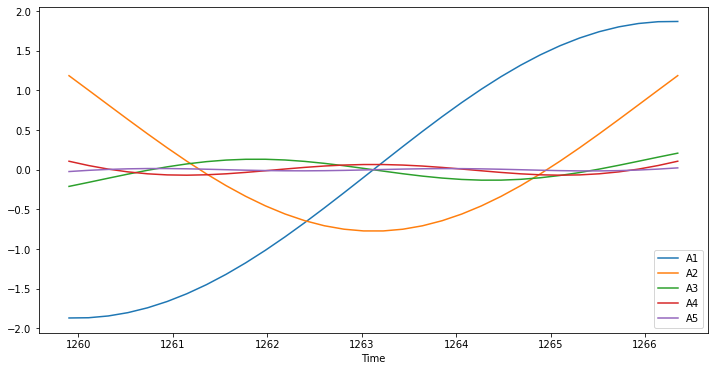

In [146]:
df.plot(x="Time", y=["A1","A2","A3","A4","A5"], figsize=(12,6))

In [147]:
train = df.iloc[:28].drop('Time', axis = 1)
test = df.iloc[28:].drop('Time', axis = 1)

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [149]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [150]:
scaled_train[:5]

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [8.30748782e-04, 9.06238031e-01, 1.49168688e-01, 6.92132813e-01,
        4.03736118e-01],
       [7.03367302e-03, 8.11873452e-01, 3.02106770e-01, 4.36214520e-01,
        7.09286092e-01],
       [1.86364643e-02, 7.17907208e-01, 4.52400432e-01, 2.37771816e-01,
        9.07773665e-01],
       [3.55560479e-02, 6.25406634e-01, 5.93883646e-01, 9.95703227e-02,
        1.00000000e+00]])

In [151]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [152]:
# Generator
n_input = 10
n_features = 5 
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [153]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [176]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse')

In [177]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 128)               68608     
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 69,253
Trainable params: 69,253
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.fit(generator,epochs=50)


Epoch 1/50
18/18 [==============================] - 1s 6ms/step - loss: 0.1364
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0536
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 0.0169
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0098
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 9/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 10/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 11/50
18/18 [==============================] - 0s 6ms/step - loss: 7.9171e-04
Epoch 12/50
18/18 [==============================] - 0s 6ms/step - loss: 6.6907e-04
Epoch 13/50
18/18 [======================

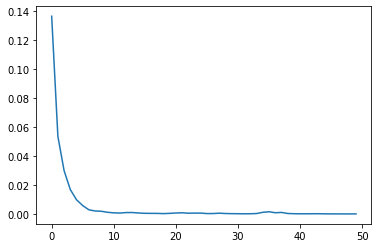

In [179]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [180]:
last_train_batch = scaled_train[-10:].reshape((1, n_input, n_features))

In [181]:
last_train_batch

array([[[0.65177226, 0.03314353, 0.37883003, 0.65552499, 0.92622951],
        [0.70315131, 0.06587851, 0.30710341, 0.55721642, 0.97956108],
        [0.75248948, 0.10879657, 0.25608509, 0.44054824, 0.96856161],
        [0.79923571, 0.16126446, 0.22975777, 0.31671649, 0.89344262],
        [0.84290541, 0.22249062, 0.23078047, 0.19824833, 0.76546272],
        [0.88300288, 0.29156602, 0.26038045, 0.09800734, 0.60546034],
        [0.91908507, 0.36749483, 0.31823627, 0.02830414, 0.44066896],
        [0.95084736, 0.44921482, 0.40262397, 0.        , 0.30116341],
        [0.97790208, 0.53564334, 0.51039067, 0.0218874 , 0.21615547],
        [1.        , 0.6256773 , 0.63728691, 0.10019551, 0.21086727]]])

In [182]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 162ms/step


array([[1.0388077 , 0.7066649 , 0.77414125, 0.17726782, 0.21022831]],
      dtype=float32)

In [183]:

scaled_test[0]

array([1.01694728, 0.71824426, 0.77814043, 0.23832881, 0.3039926 ])

In [184]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     
true_predictions = scaler.inverse_transform(test_predictions)


1/1 [==============================] - 0s 19ms/step


In [185]:
true_predictions

array([[ 1.88124255,  0.61150591,  0.05458436, -0.03790644, -0.01503517],
       [ 1.98739543,  0.70753865,  0.09409782, -0.02195898, -0.01372108],
       [ 2.10067937,  0.7616117 ,  0.12909167, -0.00405084, -0.01140975],
       [ 2.23594964,  0.77177301,  0.15774937,  0.01572505, -0.00803589]])

In [186]:
df_result = pd.DataFrame(true_predictions, columns =['A1','A2','A3','A4','A5'])

In [187]:
df_result

,A1,A2,A3,A4,A5
0,1.881243,0.611506,0.054584,-0.037906,-0.015035
1,1.987395,0.707539,0.094098,-0.021959,-0.013721
2,2.100679,0.761612,0.129092,-0.004051,-0.011410
3,2.235950,0.771773,0.157749,0.015725,-0.008036


In [188]:
test

,A1,A2,A3,A4,A5
28,1.8023,0.63418,0.055953,-0.027163,-0.011489
29,1.8444,0.81830,0.106950,0.007756,-0.003866
30,1.8670,1.00320,0.158610,0.052864,0.007847
31,1.8701,1.18700,0.208780,0.107270,0.023233


In [189]:
df_plot = pd.DataFrame({"A1_True": test.reset_index()["A1"], "A1_predicted": df_result["A1"]})

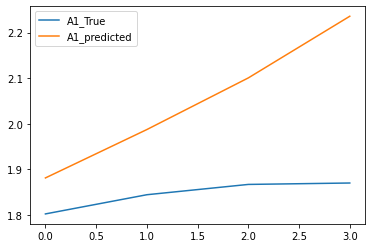

In [190]:
df_plot.plot()

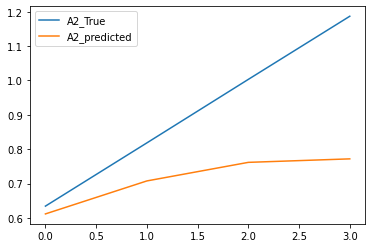

In [193]:
df_plot_2 = pd.DataFrame({"A2_True": test.reset_index()["A2"], "A2_predicted": df_result["A2"]})
df_plot_2.plot()

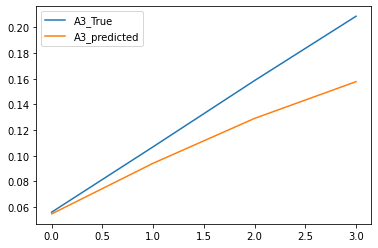

In [194]:
df_plot_3 = pd.DataFrame({"A3_True": test.reset_index()["A3"], "A3_predicted": df_result["A3"]})
df_plot_3.plot()

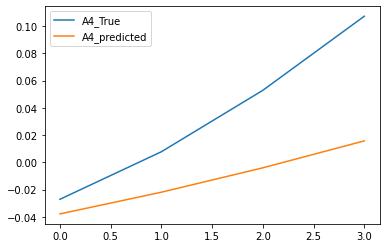

In [195]:
df_plot_4 = pd.DataFrame({"A4_True": test.reset_index()["A4"], "A4_predicted": df_result["A4"]})
df_plot_4.plot()

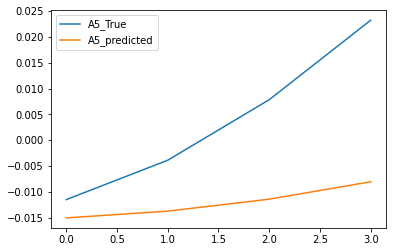

In [196]:
df_plot_5 = pd.DataFrame({"A5_True": test.reset_index()["A5"], "A5_predicted": df_result["A5"]})
df_plot_5.plot()